In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pygadgetreader import *
import h5py

In [2]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

In [3]:
#pos = readsnap('/home/ryan/snaps/run_gevolution_L3N256/lcdm_snap003_cdm', 'pos', 'dm')

pos = readsnap('/home/ryan/Downloads/lcdm_snap003_cdm', 'pos', 'dm')

Returning DM    Positions


In [4]:
#posn = readsnap('/home/ryan/snaps/run_gevolution_L3N256_Newton/lcdm_snap003_cdm', 'pos', 'dm')

In [5]:
#path = '/home/ryan/snaps/run_CDM_L3N256_DM/'

path = '/home/ryan/Downloads/'
snap = path + 'snap_009.hdf5'

In [7]:
f = h5py.File(snap, "r")

#get the total number of particles

num_pt1 = f['Header'].attrs['NumPart_Total'][1] #total number of parttype1 (pt1) particles
num_pt2 = f['Header'].attrs['NumPart_Total'][2] #total number of parttype2 (pt2) particles
#num_pt0 = f['Header'].attrs['NumPart_Total'][0]
masses_pt1 = f['Header'].attrs['MassTable'][1] #mass of all parttype1 particles (in code units)

#initialize empty arrays
#coords_pt2 = np.zeros((num_pt2, 3))
masses_pt2 = np.zeros(num_pt2)
coords_pt1 = np.zeros((num_pt1, 3))
#coords_pt0 = np.zeros((num_pt0, 3))

#fill arrays 
#pt0_so_far = 0
pt1_so_far = 0
pt2_so_far = 0

#pt0_this_file = f["Header"].attrs['NumPart_ThisFile'][0]
pt1_this_file = f["Header"].attrs['NumPart_ThisFile'][1] #number of pt1 in this chunk
pt2_this_file = f["Header"].attrs['NumPart_ThisFile'][2]
coords_pt2 = f["PartType2/Coordinates"] #get the data
coords_pt1 = f["PartType1/Coordinates"]
#coords_pt0 = f["PartType0/Coordinates"]
#masses_pt2 = f["PartType2/Masses"] 

In [22]:
xg = pos[:,0]
yg = pos[:,1]
zg = pos[:,2]

zg_med = np.median(zg)
zg_std = np.std(zg)

cutg = (zg < (zg_med + zg_std)) & (zg > (zg_med - zg_std))

In [8]:
#xn = posn[:,0]
#yn = posn[:,1]
#zn = posn[:,2]

#zn_med = np.median(zn)
#zn_std = np.std(zn)

#cutn = (zn < (zn_med + zn_std)) & (zn > (zn_med - zn_std))

In [9]:
xa = coords_pt1[:,0]
ya = coords_pt1[:,1]
za = coords_pt1[:,2]

za_med = np.median(za)
za_std = np.std(za)

cuta = (za < (za_med + za_std)) & (za > (za_med - za_std))

In [10]:
np.amax(xa)

55685.727

In [11]:
histg = np.histogram2d(xg[cutg], yg[cutg], bins=300)
xbins = histg[1]
ybins = histg[2]

histn = np.histogram2d(xn[cutn], yn[cutn], bins=[xbins, ybins])

diff = histg[0] - histn[0]

NameError: name 'xn' is not defined

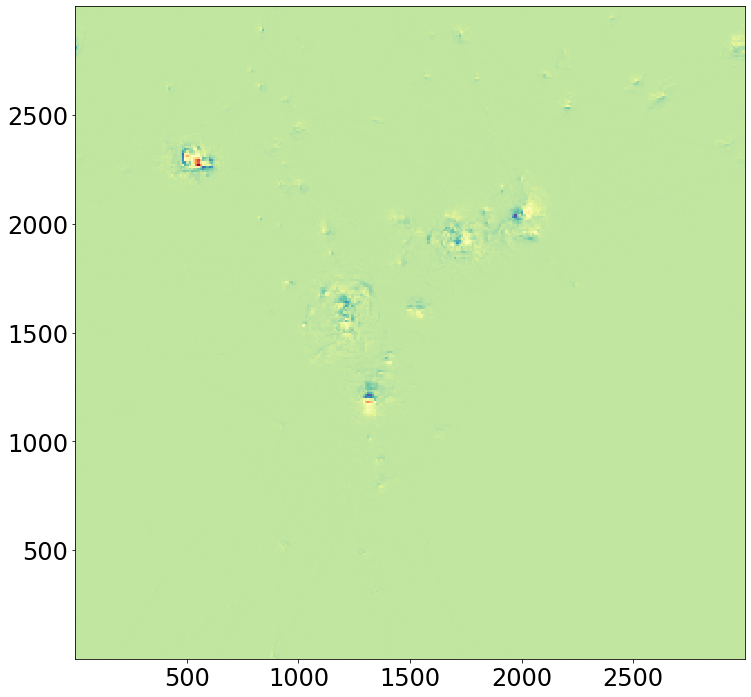

In [29]:
plt.figure(figsize=[12,12])
X, Y = np.meshgrid(xbins, ybins)
plt.pcolormesh(X, Y, diff, cmap='Spectral')
plt.show()

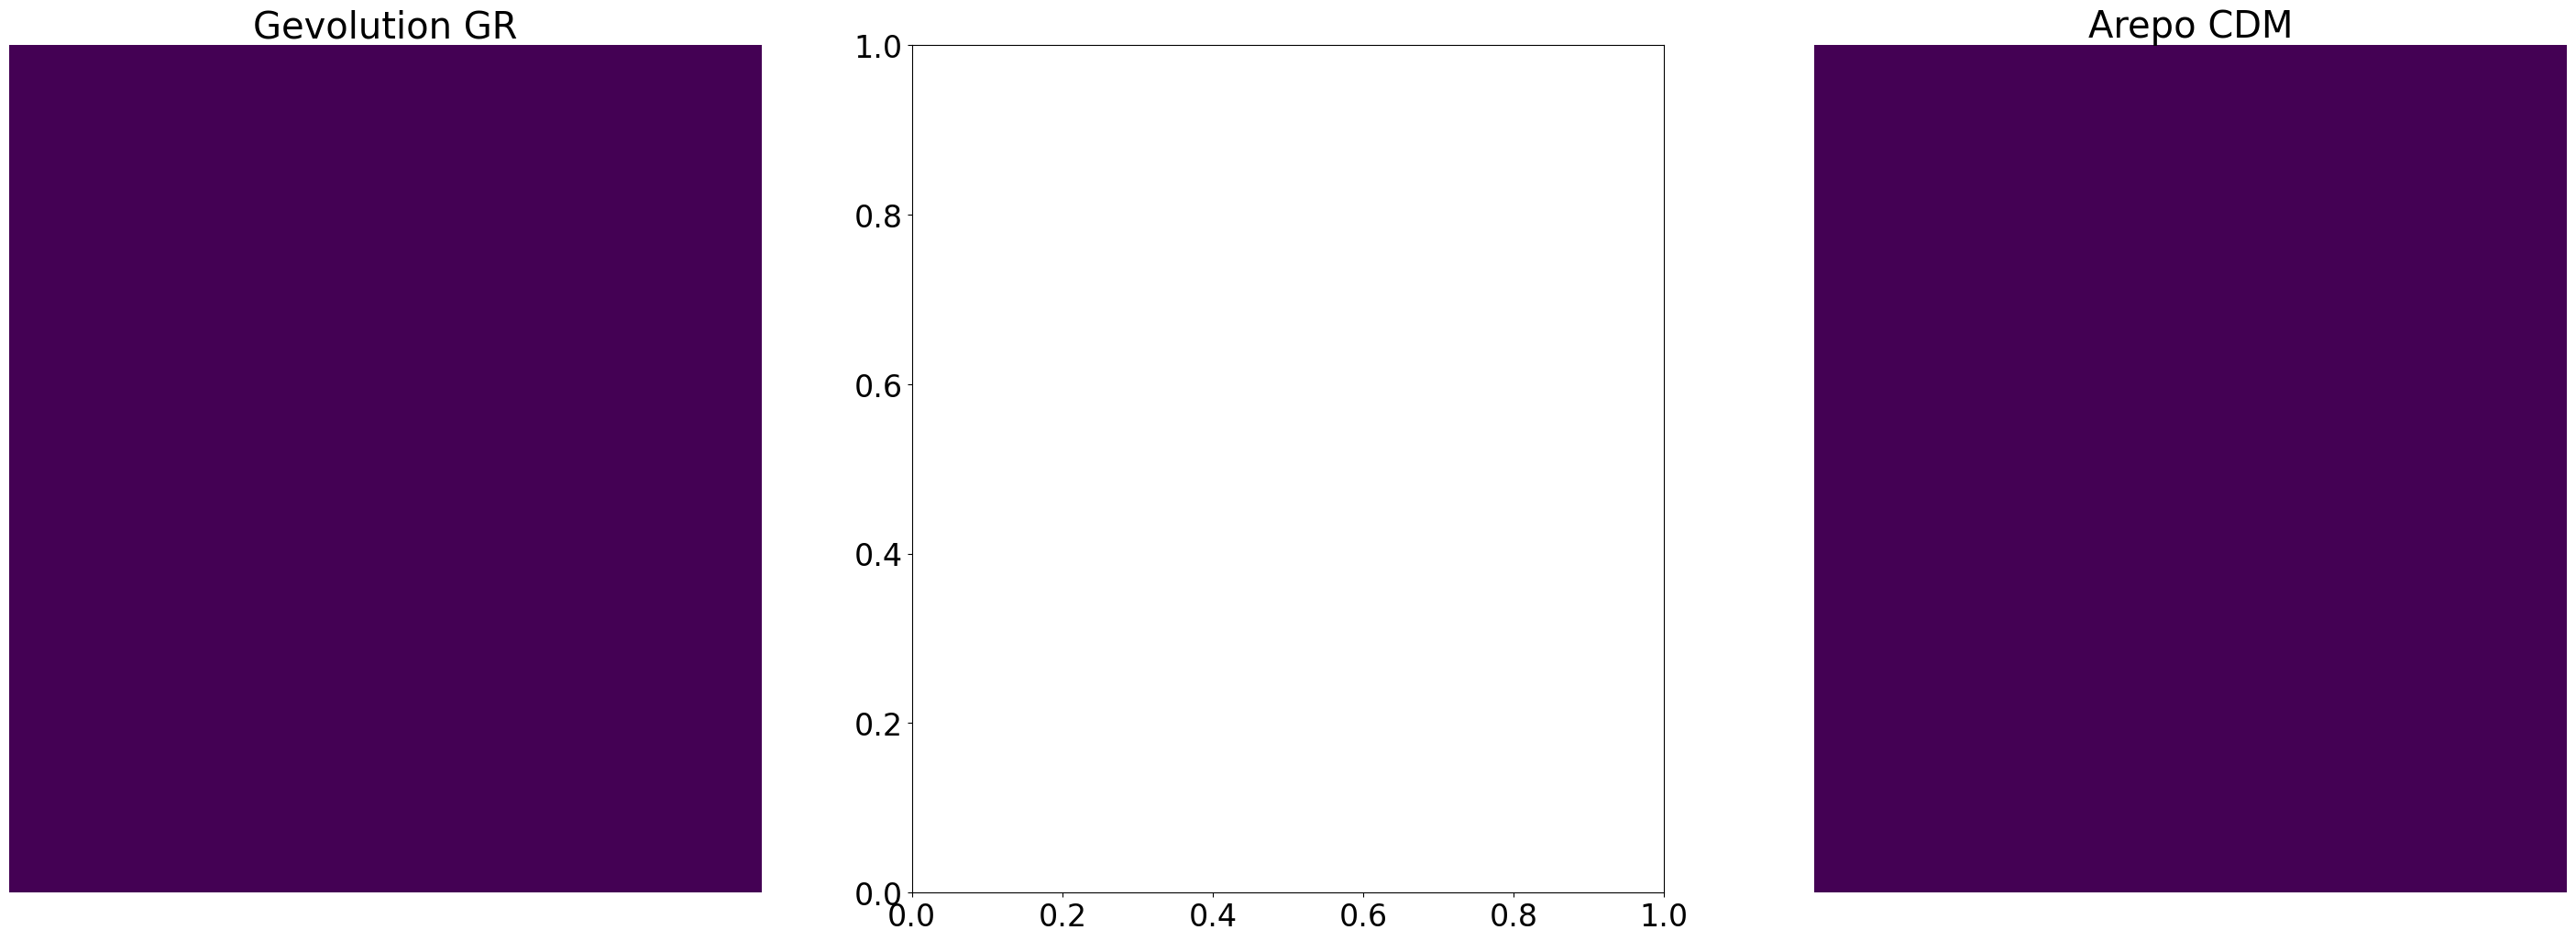

In [12]:
fig, ax = plt.subplots(1,3, figsize=[36,12])
ax[0].hist2d(xg[cutg], yg[cutg], norm=LogNorm(clip=True), bins=[xbins, ybins])
ax[0].axis('off')
ax[0].set_title('Gevolution GR')
#ax[1].hist2d(xn[cutn], yn[cutn], norm=LogNorm(clip=True), bins=[xbins, ybins])
#ax[1].axis('off')
#ax[1].set_title('Gevolution Newton')
ax[2].hist2d(xa[cuta], ya[cuta], norm=LogNorm(clip=True), bins=[xbins, ybins])
ax[2].axis('off')
ax[2].set_title('Arepo CDM')
#plt.savefig('gev_comp.png')
plt.show()

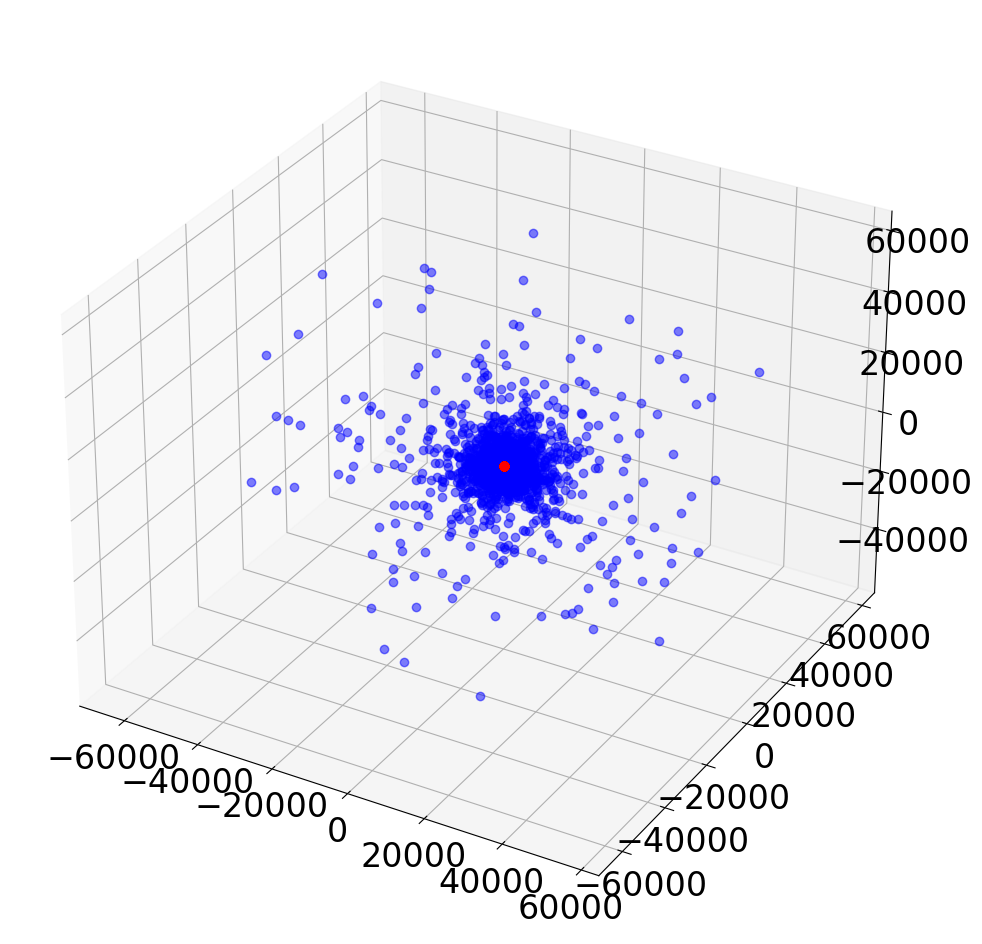

In [12]:
fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(coords_pt1[:,0], coords_pt1[:,1], coords_pt1[:,2],'o', color='b', alpha=0.5)
ax.plot3D(coords_pt2[:,0], coords_pt2[:,1], coords_pt2[:,2],'o', color='r', alpha=1)
#ax.scatter(coords_pt0[:,0], coords_pt0[:,1], coords_pt0[:,2], alpha=alphas, cmap='plasma', c=Tvals)

#ax.set_title('Looking at IC')
#ax.set_axis_off()
plt.show()

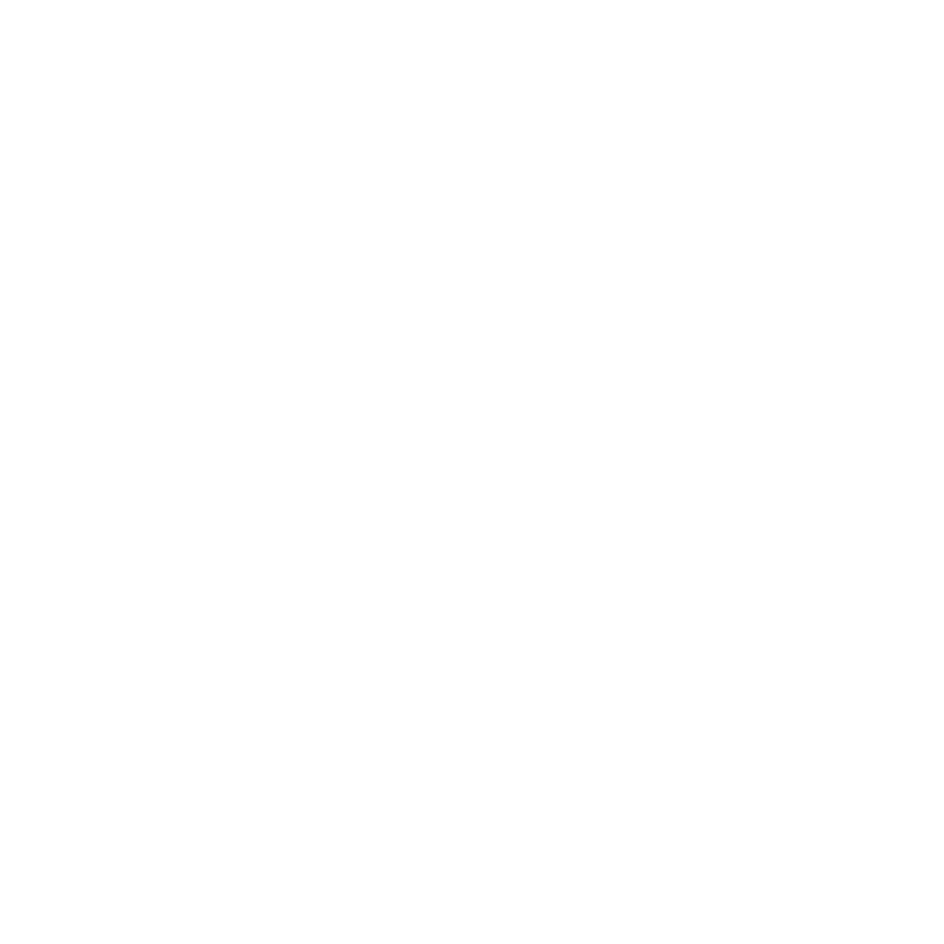

In [5]:
fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(pos[:,0], pos[:,1], pos[:,2],'o', color='r')

#ax.plot3D(coords_pt2[:,0], coords_pt2[:,1], coords_pt2[:,2],'o', color='r')
#ax.plot3D(coords_pt1[:,0], coords_pt1[:,1], coords_pt1[:,2],'o', color='b')
#ax.scatter(coords_pt0[:,0], coords_pt0[:,1], coords_pt0[:,2], alpha=alphas, cmap='plasma', c=Tvals)

#ax.set_title('Looking at IC')
ax.set_axis_off()
plt.show()

In [6]:
pos

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)